In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [3]:
df_2019 = pd.read_csv("2019_full_data.csv", index_col=0, parse_dates=True)
df_2019_backup = df_2019.copy()

df_WEP = pd.read_csv("2015_2019_WEP_TS.csv", index_col=0, parse_dates=True)
df_WEP_backup = df_WEP.copy()

In [4]:
#Replace outlier with upper limit
std = df_2019['WEP ($/MWh)'].std()
mean = df_2019['WEP ($/MWh)'].mean()
df_WEP['WEP'].loc[df_WEP['WEP'] > mean + 3*std] = mean + 3*std

df_WEP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2015-01-01 00:00:00 to 2019-12-31 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WEP     87648 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


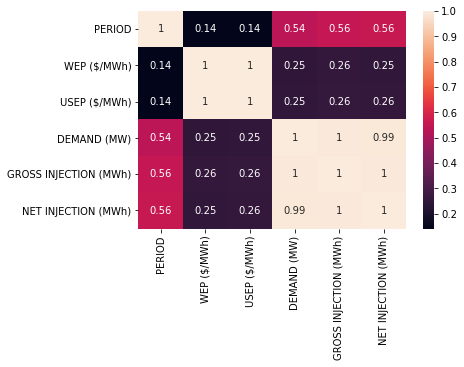

In [12]:
corr=df_2019_backup.corr()
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [5]:
#Add time information into data
df_WEP=df_WEP.resample("H").mean()
df_WEP['Year'] = df_WEP.index.year
df_WEP['Month'] = df_WEP.index.month
df_WEP['day_of_week'] = df_WEP.index.day_name()
df_WEP['day_of_week_int'] = df_WEP.index.dayofweek
df_WEP['hour'] = df_WEP.index.hour

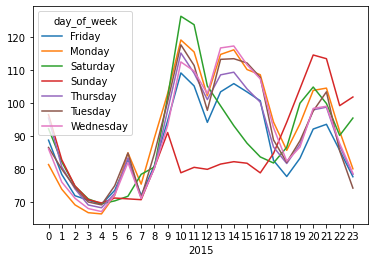

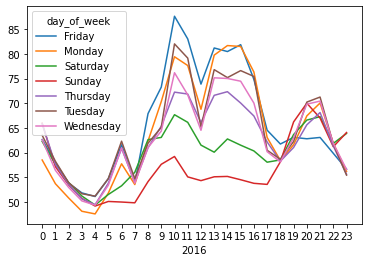

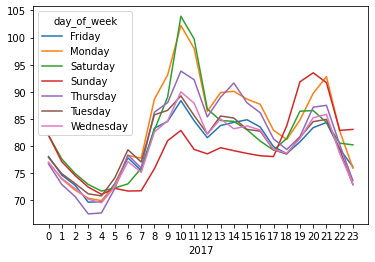

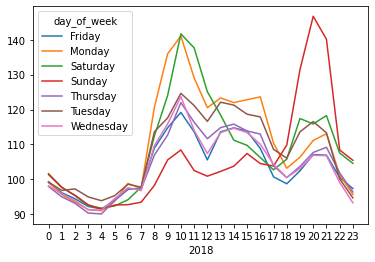

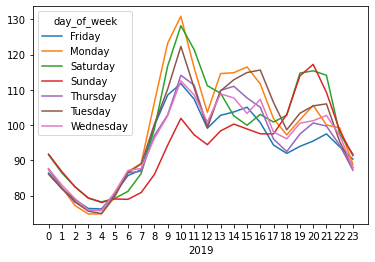

In [6]:
for year in range(2015,2020):
    df_WEP[str(year)].pivot_table(index='hour',columns='day_of_week', values='WEP').plot()
    plt.xticks(range(0,24))
    plt.xlabel(year)




In [7]:
#df_WEP.pivot_table(index='hour',columns='day_of_week', values='WEP')

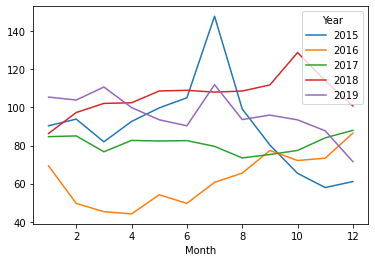

In [8]:
df_WEP.pivot_table(index='Month',columns='Year', values='WEP').plot()

([<matplotlib.axis.XTick at 0x264c911fb08>,
 <a list of 14 Text major ticklabel objects>)

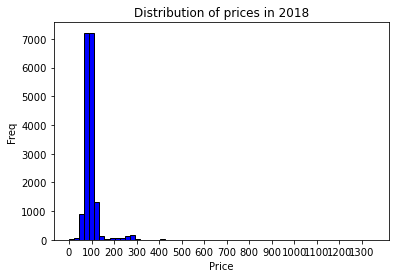

In [9]:
df_WEP_2019=df_WEP_backup['2019']


plt.hist(df_WEP_2019['WEP'], color = 'blue', edgecolor = 'black', bins = 60)

plt.title('Distribution of prices in 2018')
plt.xlabel('Price')
plt.ylabel('Freq')
plt.xticks(range(0,1400,100))

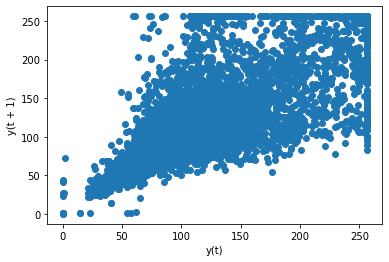

In [10]:
pd.plotting.lag_plot(df_WEP['WEP'],lag=1)

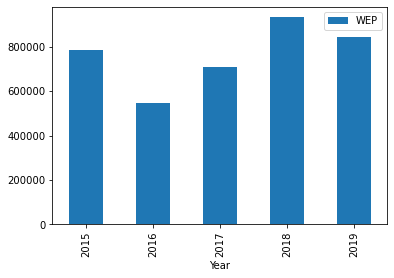

In [11]:
df_WEP.resample('Y').agg({'WEP':'sum','Year':'mean'}).plot(kind='bar',y='WEP',x='Year')

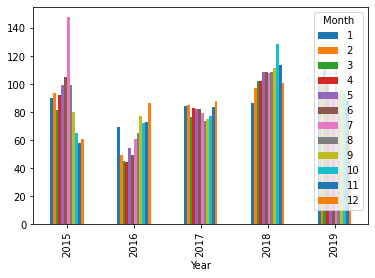

In [12]:
df_WEP.pivot_table(index='Year',columns='Month', values='WEP').plot(kind='bar')

In [13]:
df_WEP

,WEP,Year,Month,day_of_week,day_of_week_int,hour
2015-01-01 00:00:00,92.055,2015,1,Thursday,3,0
2015-01-01 01:00:00,90.660,2015,1,Thursday,3,1
2015-01-01 02:00:00,82.655,2015,1,Thursday,3,2
2015-01-01 03:00:00,76.625,2015,1,Thursday,3,3
2015-01-01 04:00:00,75.865,2015,1,Thursday,3,4
...,...,...,...,...,...,...
2019-12-31 19:00:00,79.415,2019,12,Tuesday,1,19
2019-12-31 20:00:00,79.670,2019,12,Tuesday,1,20
2019-12-31 21:00:00,76.895,2019,12,Tuesday,1,21
2019-12-31 22:00:00,71.005,2019,12,Tuesday,1,22


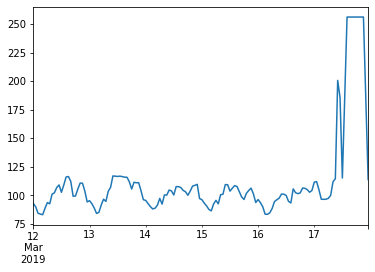

In [14]:
df_WEP['2019-3-12':'2019-3-17']['WEP'].plot()

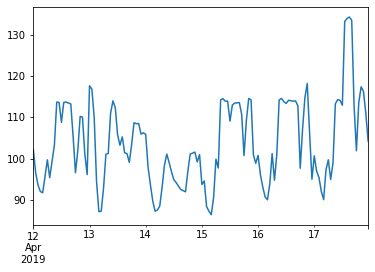

In [15]:
df_WEP['2019-4-12':'2019-4-17']['WEP'].plot()

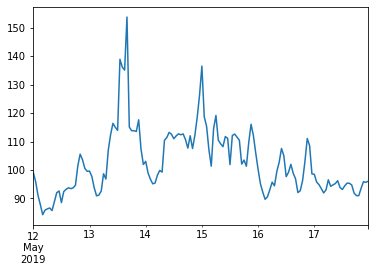

In [16]:
df_WEP['2019-5-12':'2019-5-17']['WEP'].plot()

In [23]:
asd=pd.DataFrame()
asd['WEP']=df_WEP['WEP']
asd.index = df_WEP.index
asd.head(8)

,WEP
2015-01-01 00:00:00,92.055
2015-01-01 01:00:00,90.660
2015-01-01 02:00:00,82.655
2015-01-01 03:00:00,76.625
2015-01-01 04:00:00,75.865
2015-01-01 05:00:00,75.325
2015-01-01 06:00:00,76.685
2015-01-01 07:00:00,77.510
